In [1]:
FRAME_SIZE = 150
HOP_RATIO = 0.1
N_FFT = 1024

In [2]:
import importlib
import modules.AudioProcessor
importlib.reload(modules.AudioProcessor)
from modules.AudioProcessor import AudioProcessor

audio_files = [
    './dataset/trimmed_crowd_talking.mp3',
    './dataset/trimmed_motor_riding.mp3',
    './dataset/trimmed_water_flowing.mp3'
]
ap = AudioProcessor(
    audio_files, 
    frame_size_ms=FRAME_SIZE, 
    hop_length_ratio=HOP_RATIO
    )
print(ap.frames.shape)
print(ap.class_ids.shape)
print(ap.timestamps.shape)

torch.Size([2664, 7200])
(2664,)
(2664,)


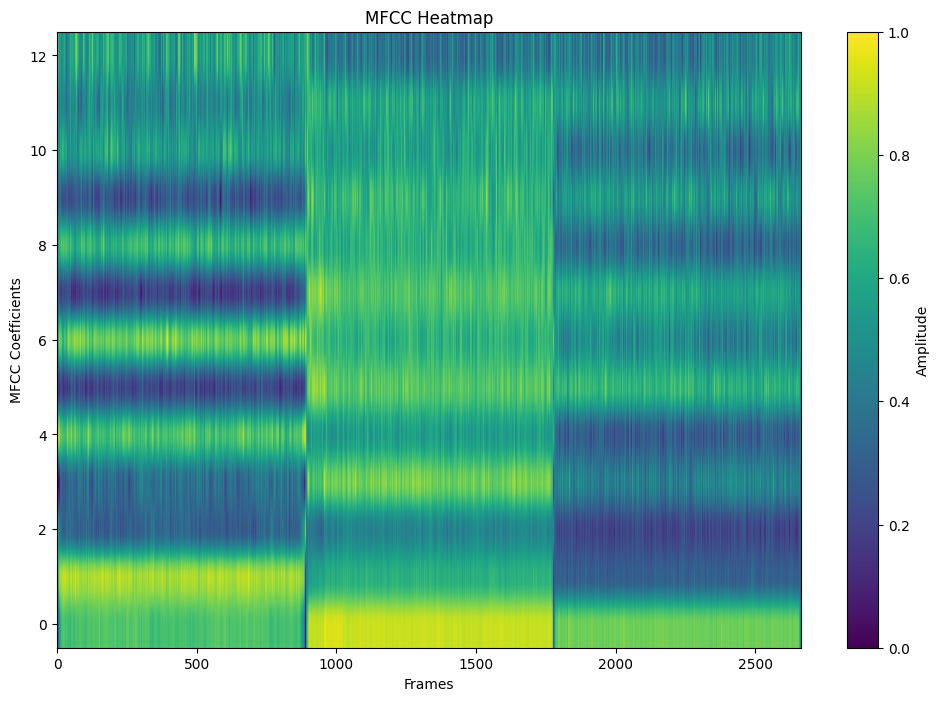

torch.Size([2664, 13])

In [3]:
import importlib
import modules.FeatureExtractor
importlib.reload(modules.FeatureExtractor)
from modules.FeatureExtractor import FeatureExtractor

fe = FeatureExtractor(n_fft=N_FFT)
fe.extract_mfcc(ap.frames)
fe.plot_mfccs()
fe.mfcc_features.shape

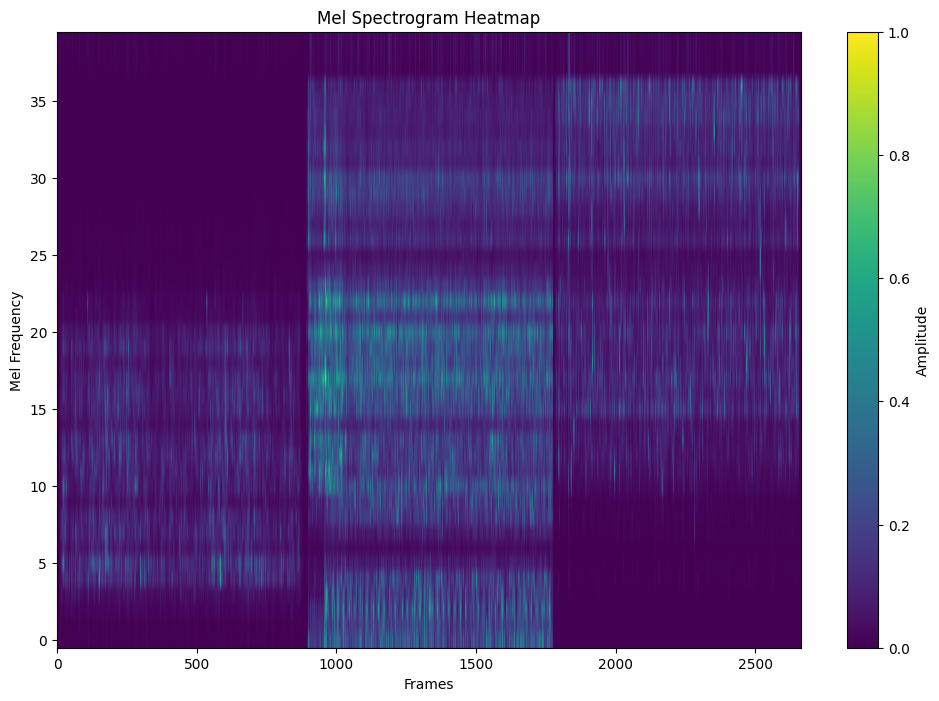

torch.Size([2664, 40])

In [4]:
fe.extract_melspectrogram(ap.frames)
fe.plot_melspectrogram()
fe.melspectrogram_features.shape

In [5]:
import warnings
import importlib
import modules.DatasetHandler
importlib.reload(modules.DatasetHandler)
from modules.DatasetHandler import DatasetHandler

warnings.filterwarnings("ignore")

dh = DatasetHandler(
    class_ids=ap.class_ids,
    timestamps=ap.timestamps, 
    mfccs=fe.mfcc_features, 
    mfsc=fe.melspectrogram_features,
    output_dir='output/no_pca' 
)
dh.generate_csv('all_features.csv')

In [6]:
important_mfccs = [i for i in range(13)]
important_mfsc = []
dh.save_selected_features(important_mfccs, important_mfsc, "mfccs_only.csv")
time_series_tensor = dh.generate_time_series('mfccs_only.csv', 'mfccs')

important_mfccs = []
important_mfsc = [i for i in range(40)]
dh.save_selected_features(important_mfccs, important_mfsc, "melspec_only.csv")
time_series_tensor = dh.generate_time_series('melspec_only.csv', 'melspec')

important_mfccs = [1, 3, 4, 5, 6, 7, 8, 9, 10, 11]
important_mfsc = [i for i in range(14)] + [i for i in range(16, 35)]
dh.save_selected_features(important_mfccs, important_mfsc, "combined.csv")
time_series_tensor = dh.generate_time_series('combined.csv', 'combined')


In [7]:
import modules.ART2Clusterer
importlib.reload(modules.ART2Clusterer)
from modules.ART2Clusterer import ART2Clusterer
import pandas as pd

def cluster_dataset(i, filename, n_features, plot_name, vigilance, pca=False):
    magenta = "\033[35m"
    green = "\033[32m"
    end = "\033[0m"
    optimal_tag = f"{green}(Optimal){end}" if pca and filename == "mfccs" else ""
    print(f"{magenta}Clustering time series {i}{end} - {filename} features {optimal_tag}")

    df = pd.read_csv(f'output/{"" if pca else "no_"}pca/time_series_{i}/{filename}_{i}.csv')
    clusterer = ART2Clusterer(
        vigilance=vigilance, 
        n_features=n_features,
        time_series_index=i,
        pca=pca
    )
    for index, row in df.iterrows():
        clusterer.fit_clusters(row)

    clusterer.write_to_csv()
    conf_matrix, acc = clusterer.calc_accuracy()
    print(f"{green}Accuracy:{end} {acc}")
    print(f"{green}Confusion Matrix:{end}\n{conf_matrix}")
    clusterer.plot_truth_vs_time(plot_name)

Clustering time series 0 - mfccs features 
Accuracy: 0.9222972972972973
Confusion Matrix:
[[276   0   0]
 [  0 258   0]
 [  0   0 285]]


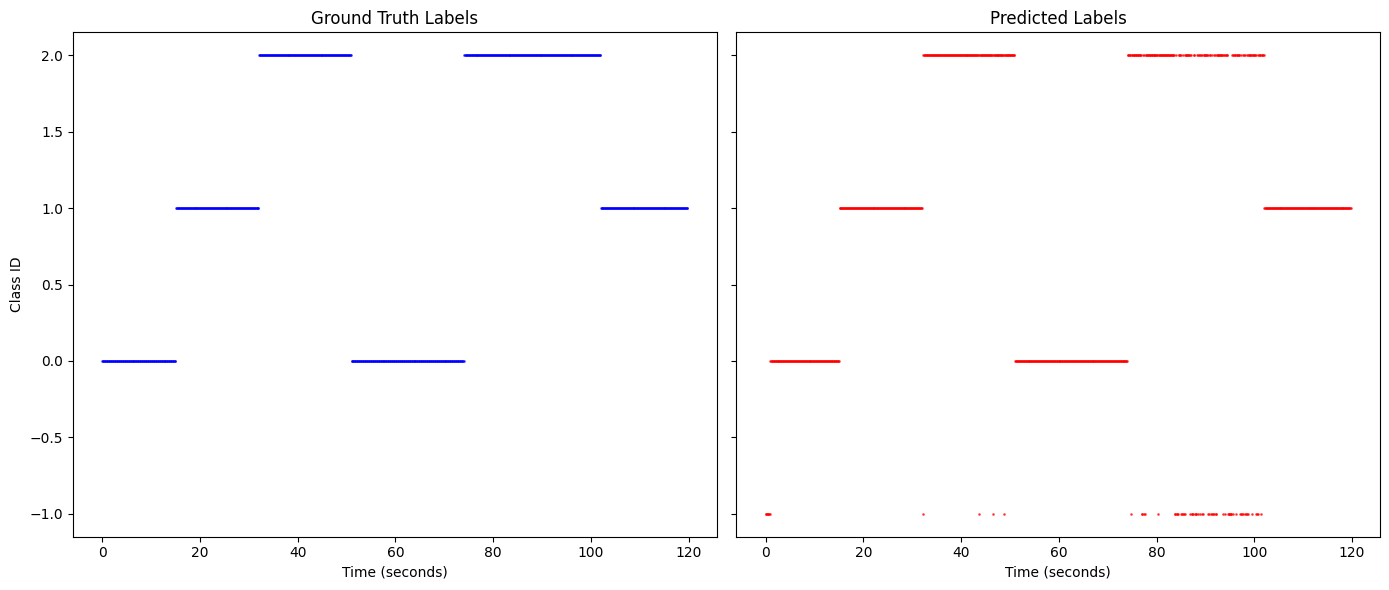

Clustering time series 0 - melspec features 
Accuracy: 0.5394144144144144
Confusion Matrix:
[[  0   0 229]
 [  5 178  19]
 [  0   6 301]]


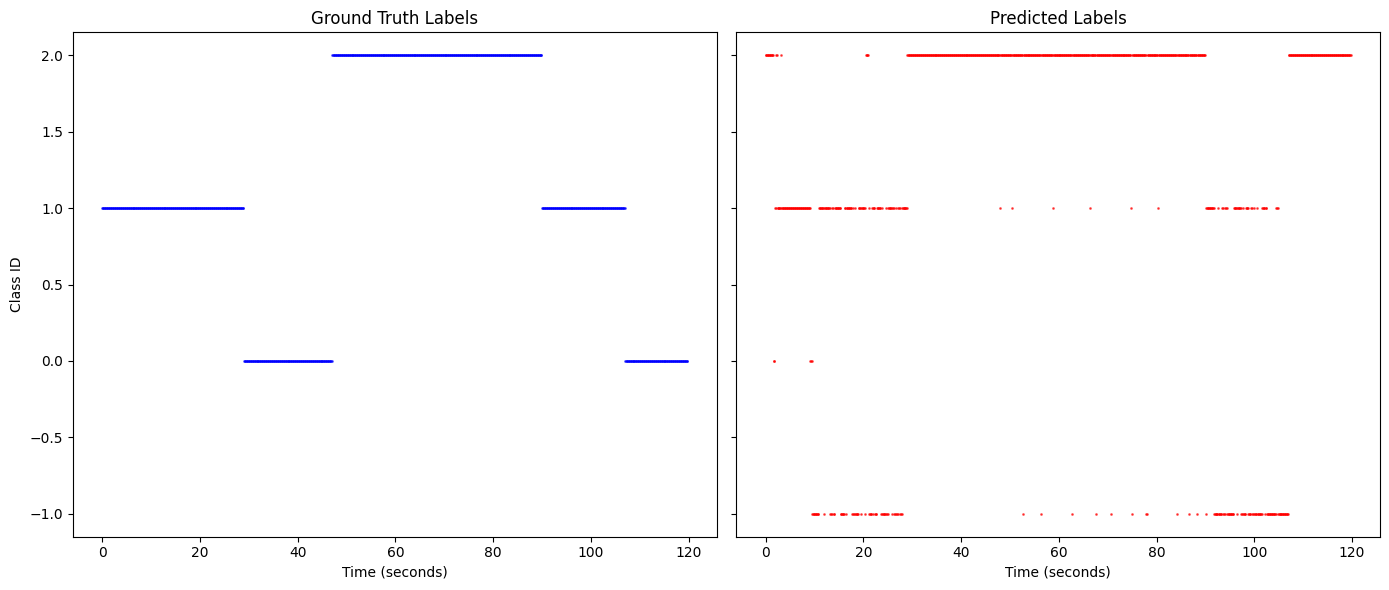

Clustering time series 0 - combined features 
Accuracy: 0.9853603603603603
Confusion Matrix:
[[162   0   0]
 [  0 343   4]
 [  0   0 370]]


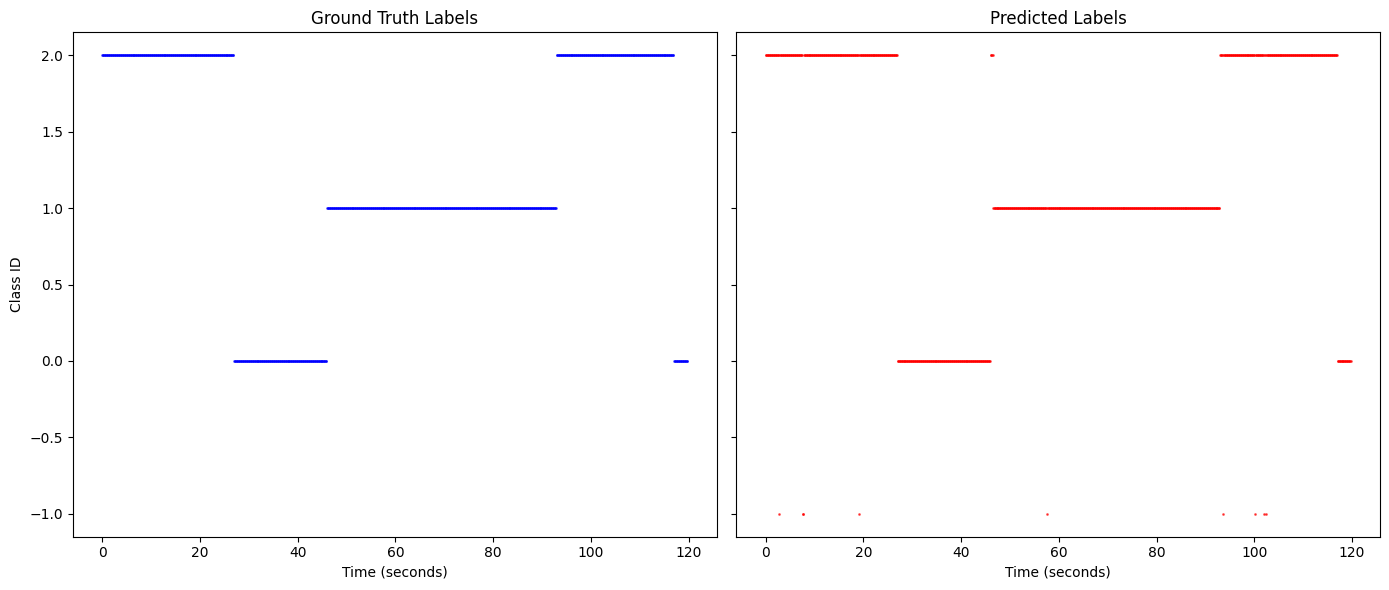

--------------------------------------------------------------------------------
Clustering time series 1 - mfccs features 
Accuracy: 0.9921171171171171
Confusion Matrix:
[[319   0   0]
 [  0 236   0]
 [  0   0 326]]


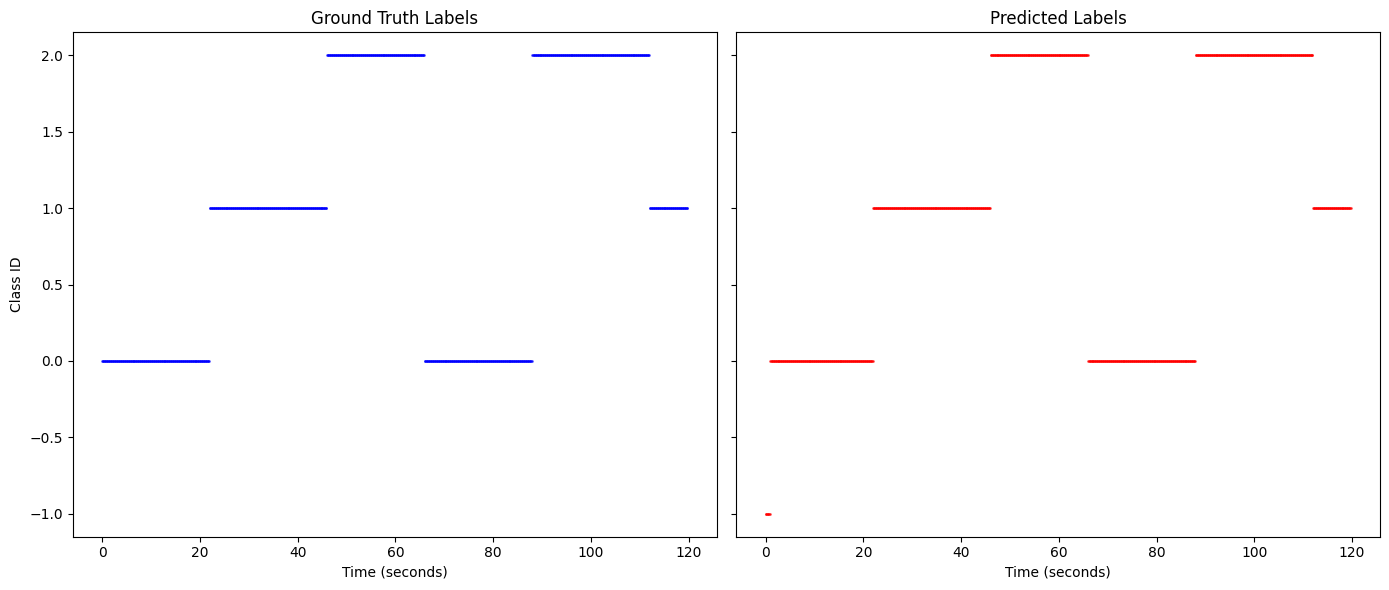

Clustering time series 1 - melspec features 
Accuracy: 0.9234234234234234
Confusion Matrix:
[[204   0   0]
 [  0 315   4]
 [ 36   0 301]]


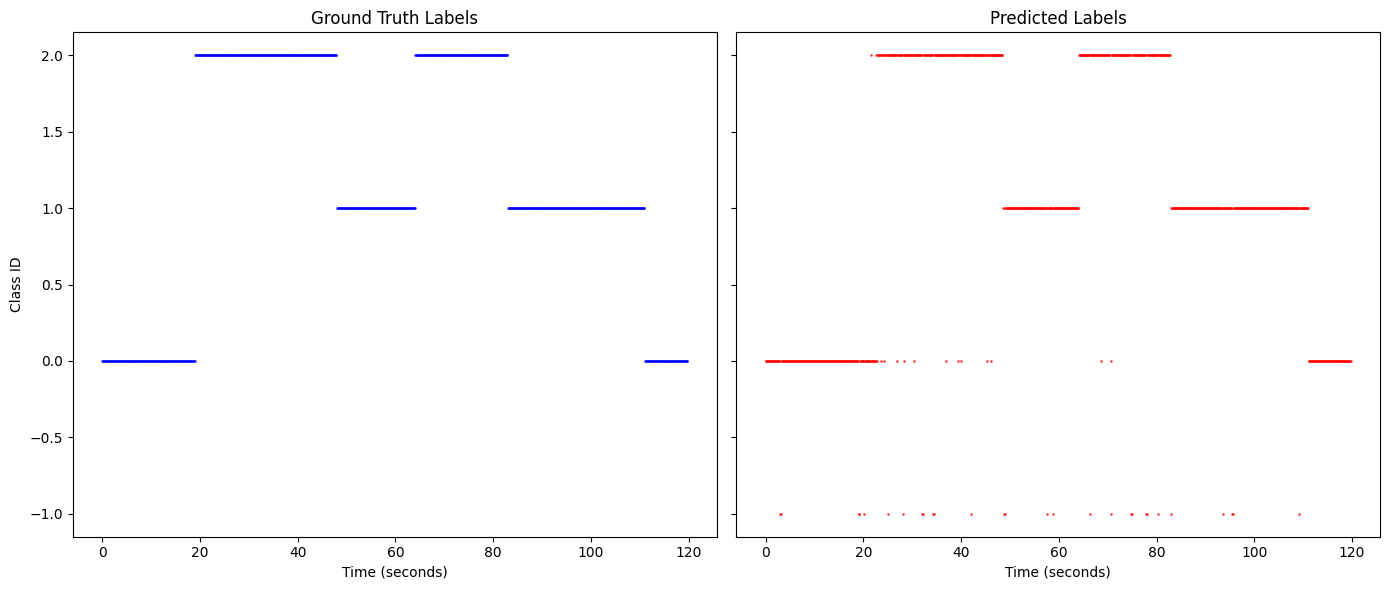

Clustering time series 1 - combined features 
Accuracy: 0.9932432432432432
Confusion Matrix:
[[333   0   0]
 [  0 295   1]
 [  0   0 254]]


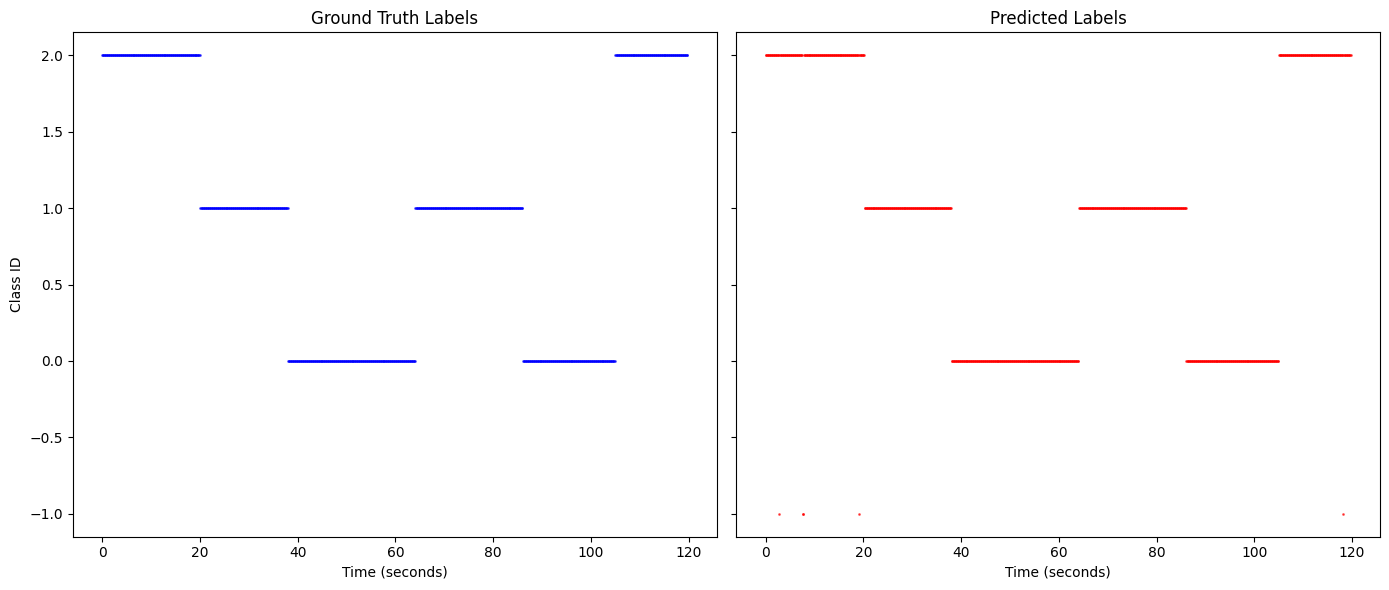

--------------------------------------------------------------------------------
Clustering time series 2 - mfccs features 
Accuracy: 0.9887387387387387
Confusion Matrix:
[[301   0   0]
 [  0 200   0]
 [  0   0 377]]


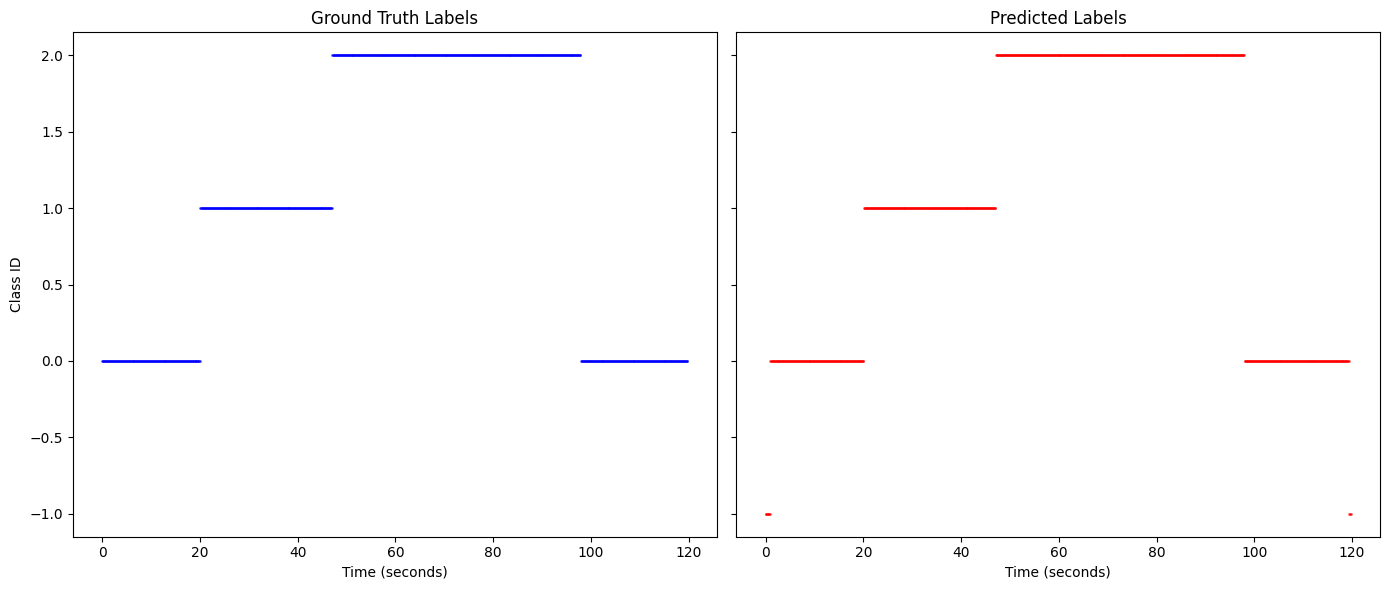

Clustering time series 2 - melspec features 
Accuracy: 0.5844594594594594
Confusion Matrix:
[[  0   0 250]
 [  5 179  17]
 [  0   1 340]]


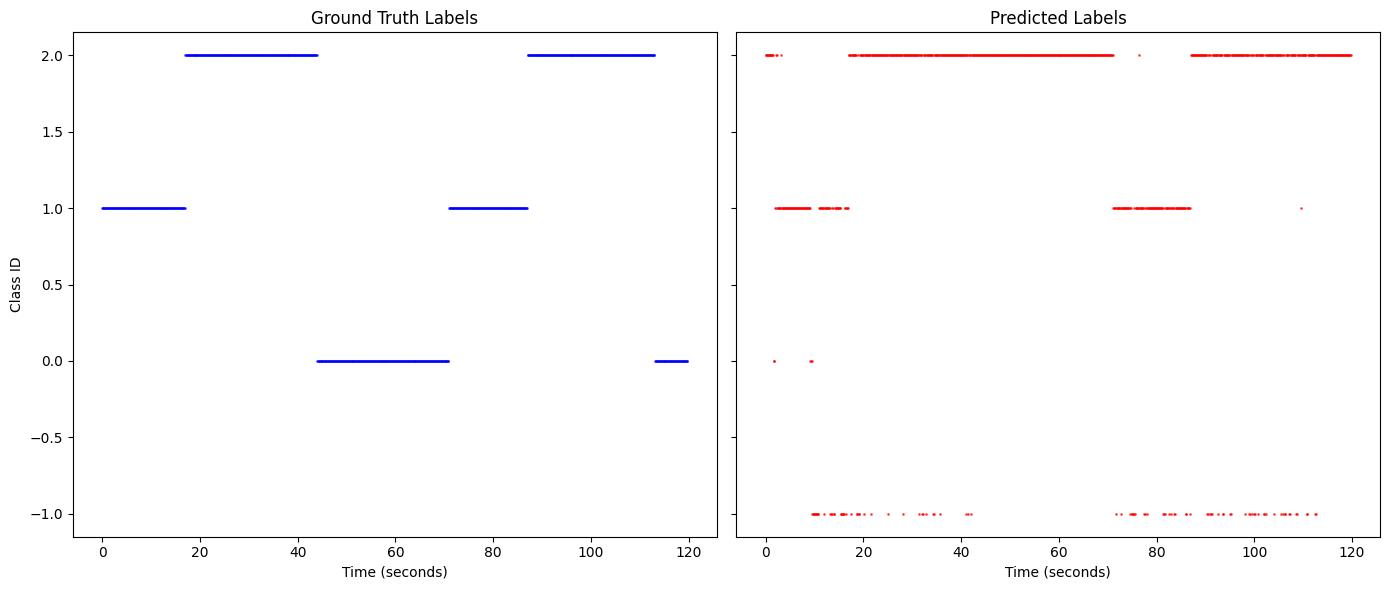

Clustering time series 2 - combined features 
Accuracy: 0.9774774774774775
Confusion Matrix:
[[306   0   3]
 [  0 193   7]
 [  0   0 369]]


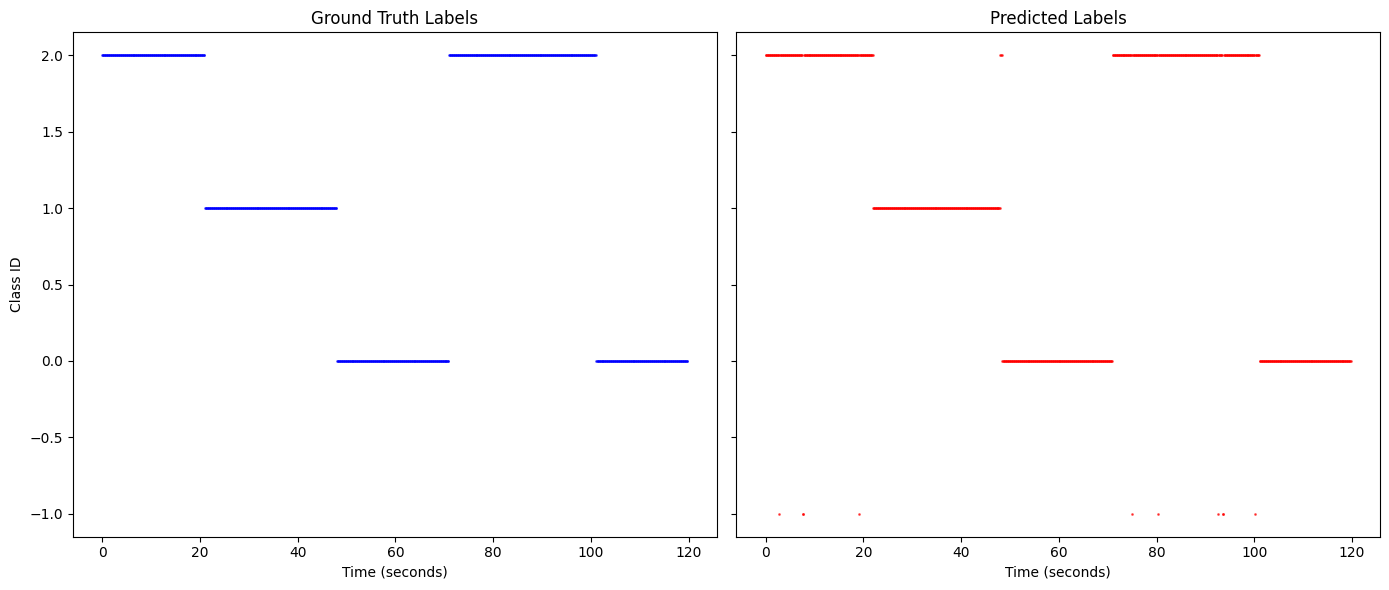

--------------------------------------------------------------------------------
Clustering time series 3 - mfccs features 
Accuracy: 0.9988738738738738
Confusion Matrix:
[[363   0   0]
 [  0 222   0]
 [  0   0 302]]


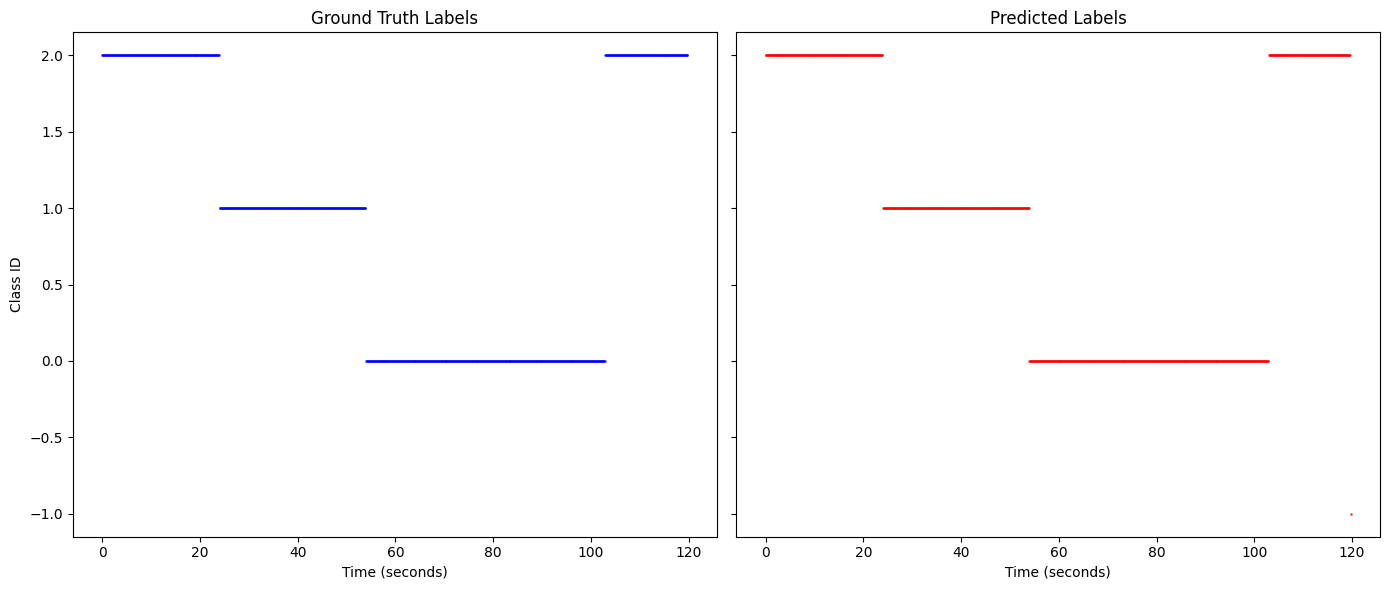

Clustering time series 3 - melspec features 
Accuracy: 0.5405405405405406
Confusion Matrix:
[[  2   0 257]
 [  0 134  18]
 [  0   0 344]]


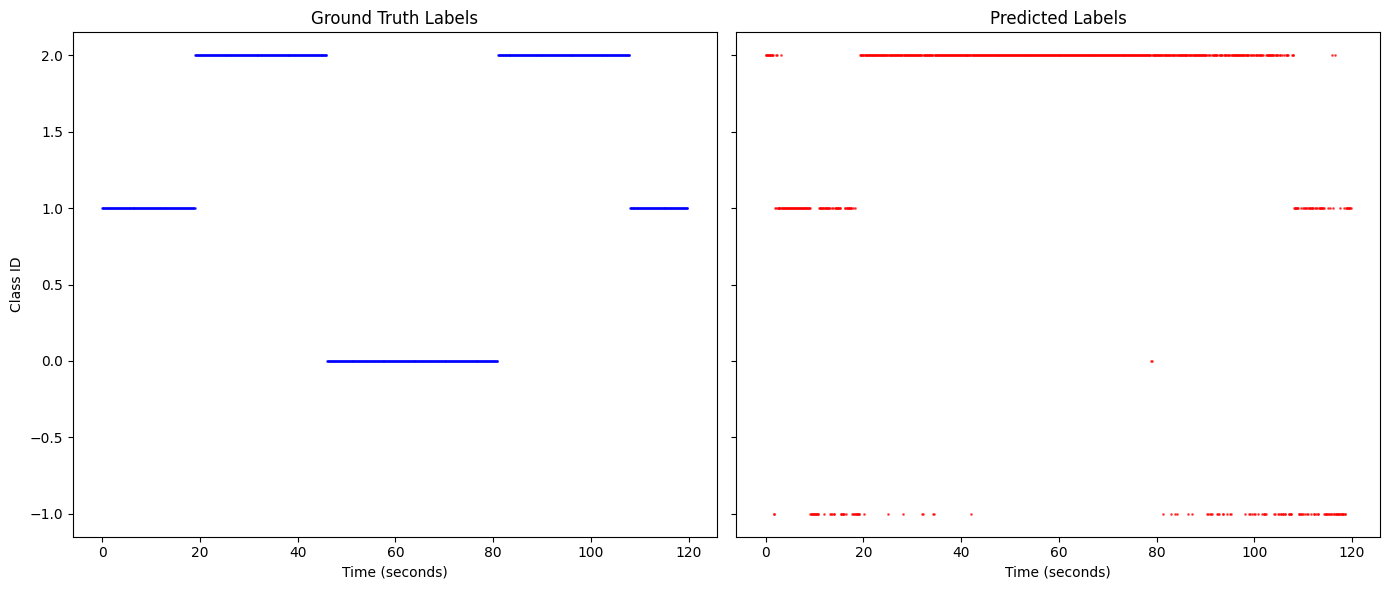

Clustering time series 3 - combined features 
Accuracy: 0.9842342342342343
Confusion Matrix:
[[324   0   0]
 [  0 255   1]
 [  4   0 295]]


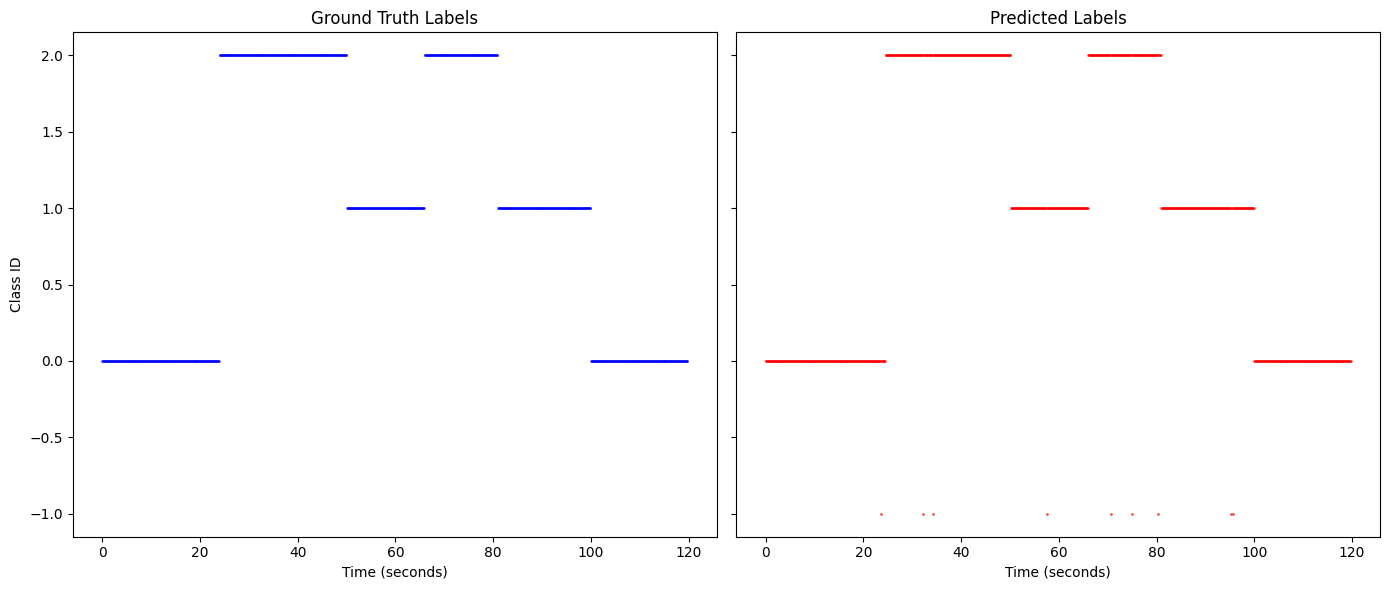

--------------------------------------------------------------------------------
Clustering time series 4 - mfccs features 
Accuracy: 0.9876126126126126
Confusion Matrix:
[[285   0   0]
 [  0 282   0]
 [  0   1 310]]


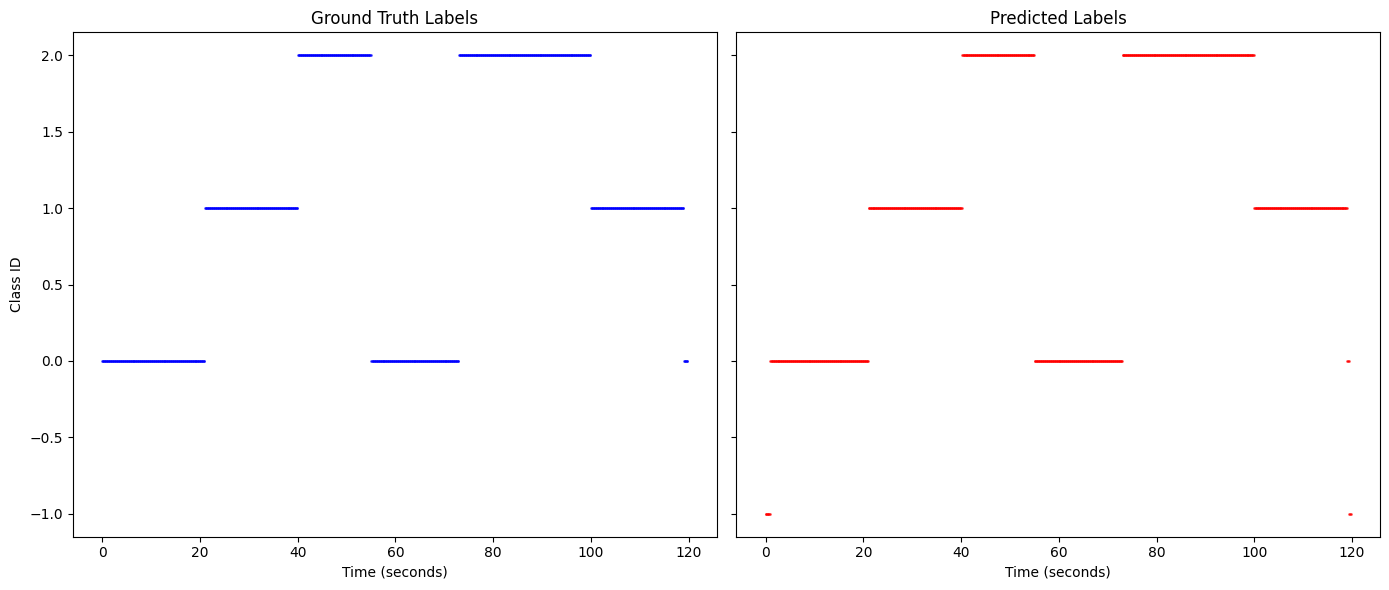

Clustering time series 4 - melspec features 
Accuracy: 0.7894144144144144
Confusion Matrix:
[[315   0   0]
 [  0 257   0]
 [108   0 129]]


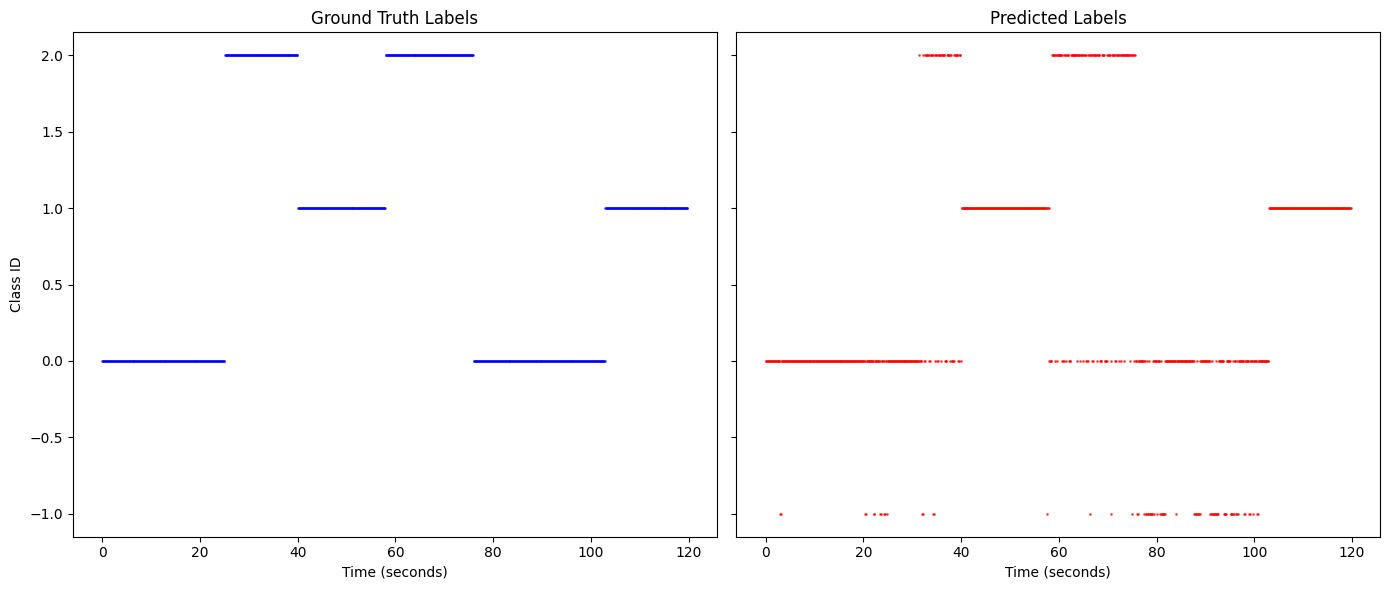

Clustering time series 4 - combined features 
Accuracy: 0.9898648648648649
Confusion Matrix:
[[327   0   0]
 [  0 228   0]
 [  0   0 324]]


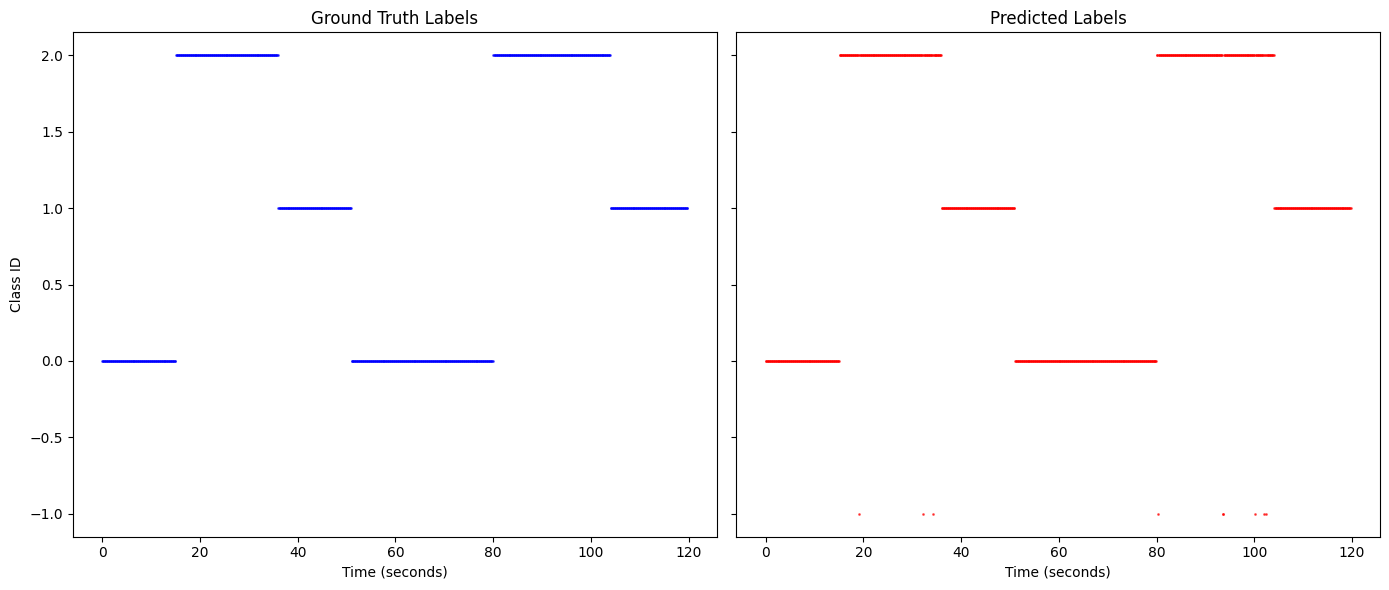

--------------------------------------------------------------------------------


In [8]:
MFCC_VIGILANCE = 0.5
MELSPEC_VIGILANCE = 0.95
COMBINED_VIGILANCE = 1.4

n_features = len(important_mfccs) + len(important_mfsc)
for i in range(5):
    cluster_dataset(i, 'mfccs', 13, 'MFCCs Only Ground Truth vs Predicted Labels', MFCC_VIGILANCE)
    cluster_dataset(i, 'melspec', 40, 'MFSCs Only Ground Truth vs Predicted Labels', MELSPEC_VIGILANCE)
    cluster_dataset(i, 'combined', n_features, 'Combined Ground Truth vs Predicted Labels', COMBINED_VIGILANCE)
    print('-'*80)

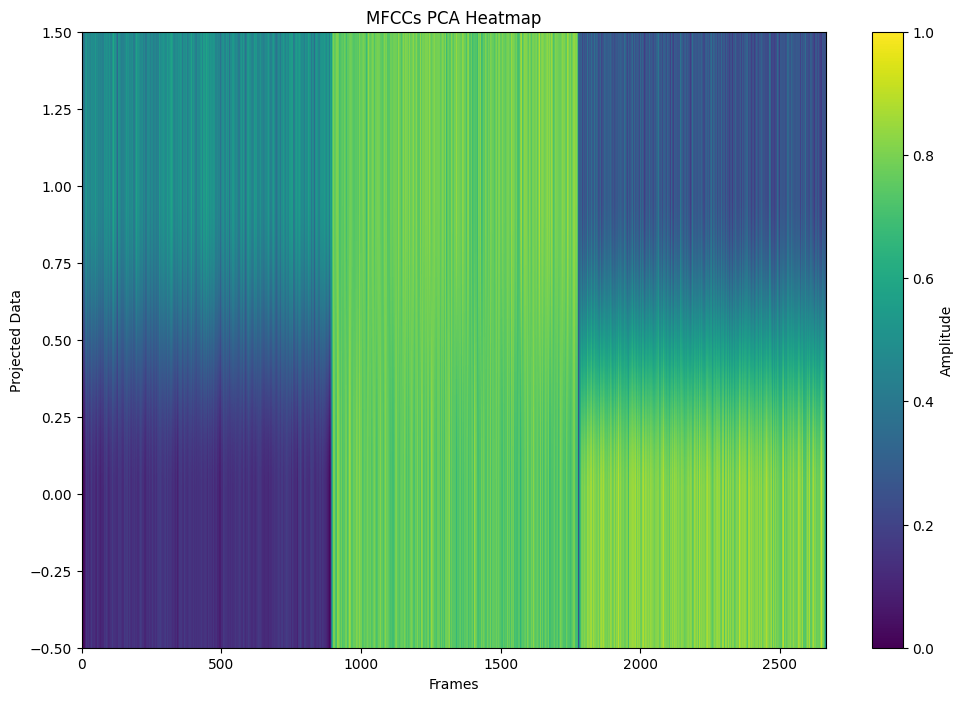

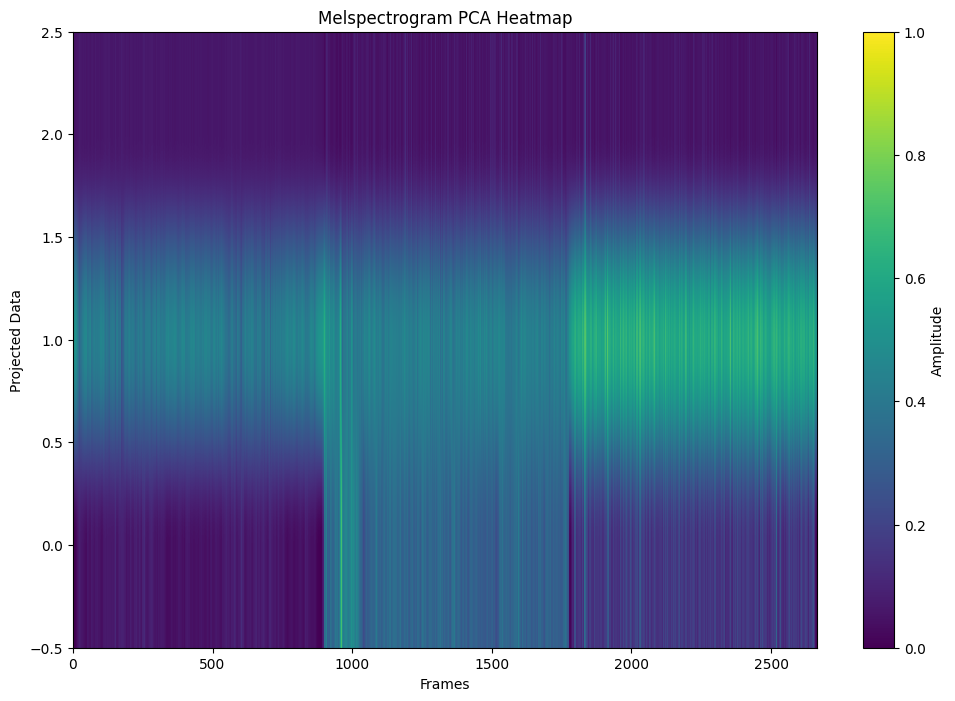

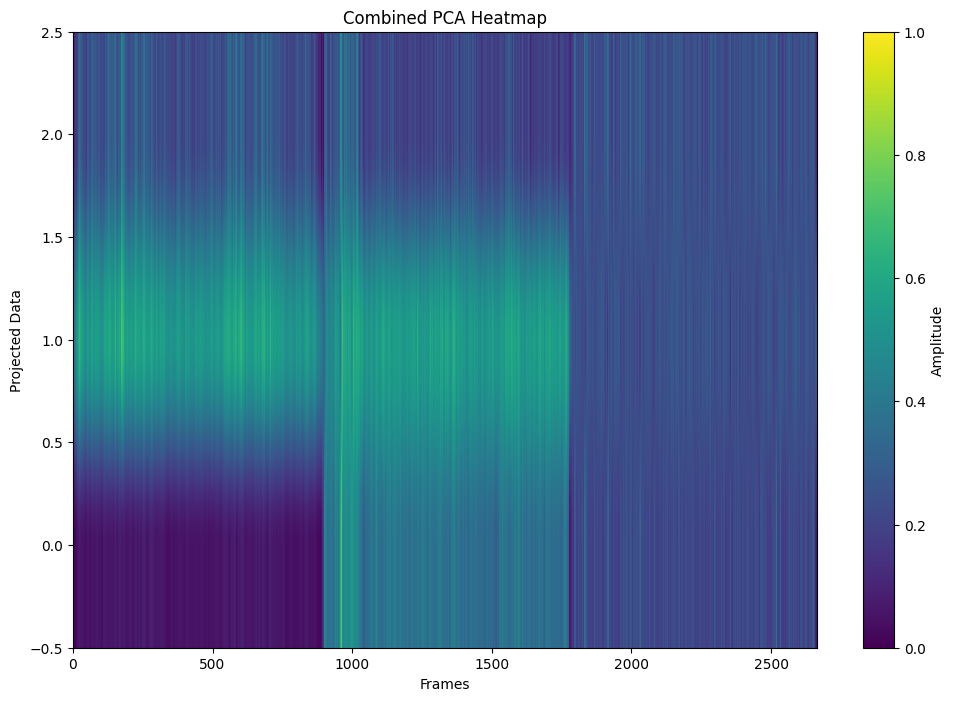

In [9]:
import modules.PCA
importlib.reload(modules.PCA)
from modules.PCA import PCA

mfccs_pca = PCA('output/no_pca/mfccs_only.csv', 0.6)
mfccs_pca.plot_projected_data("MFCCs PCA Heatmap")

mfsc_pca = PCA('output/no_pca/melspec_only.csv',  0.6)
mfsc_pca.plot_projected_data("Melspectrogram PCA Heatmap")

combined_pca = PCA('output/no_pca/combined.csv',  0.6)
combined_pca.plot_projected_data("Combined PCA Heatmap")
dh.set_output('output/pca')

dh.features = mfccs_pca.projected_data
dh.generate_csv("mfccs_only.csv", pca=True)
time_series_tensor = dh.generate_time_series('mfccs_only.csv', 'mfccs')

dh.features = mfsc_pca.projected_data
dh.generate_csv("melspec_only.csv", pca=True)
time_series_tensor = dh.generate_time_series('melspec_only.csv', 'melspec')

dh.features = combined_pca.projected_data
dh.generate_csv("combined.csv", pca=True)
time_series_tensor = dh.generate_time_series('combined.csv', 'combined')

# Optimal Clustering Results for PCA
Look at the graphs with only MFCC features for most optimal results

Clustering time series 0 - mfccs features (Optimal)
Accuracy: 0.9932432432432432
Confusion Matrix:
[[348   0   0]
 [  6 185   0]
 [  0   0 349]]


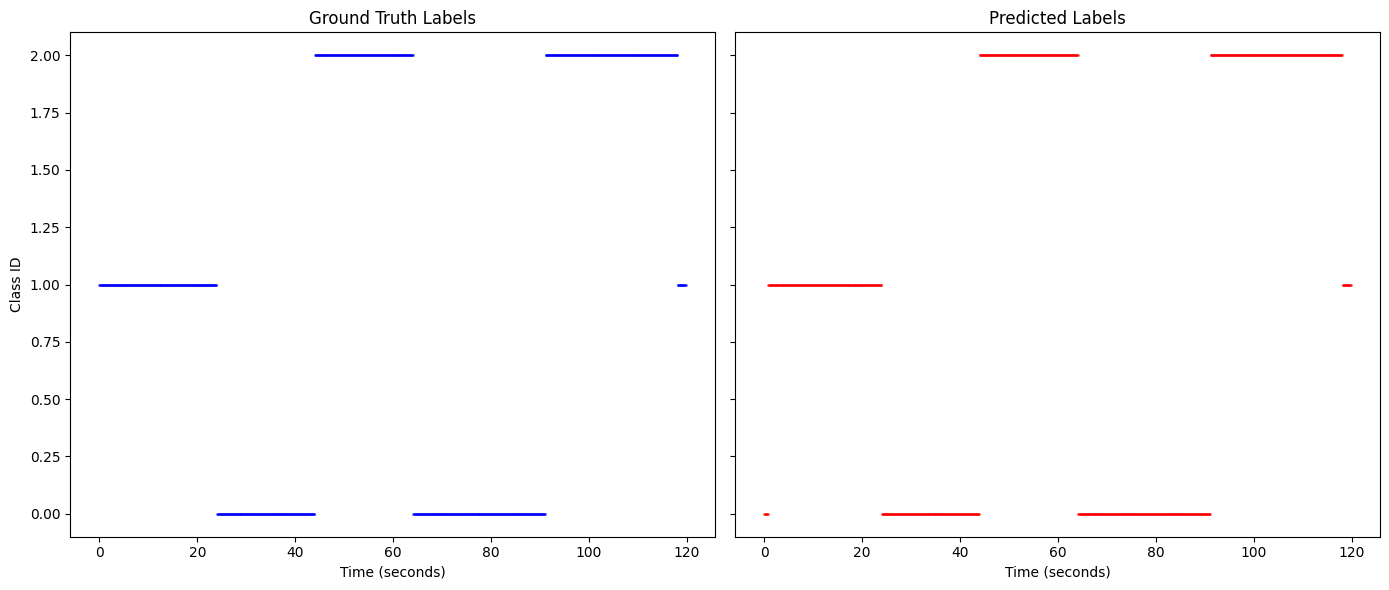

Clustering time series 0 - melspec features 
Accuracy: 0.6137387387387387
Confusion Matrix:
[[212   8   0]
 [ 17 332   0]
 [  0 318   1]]


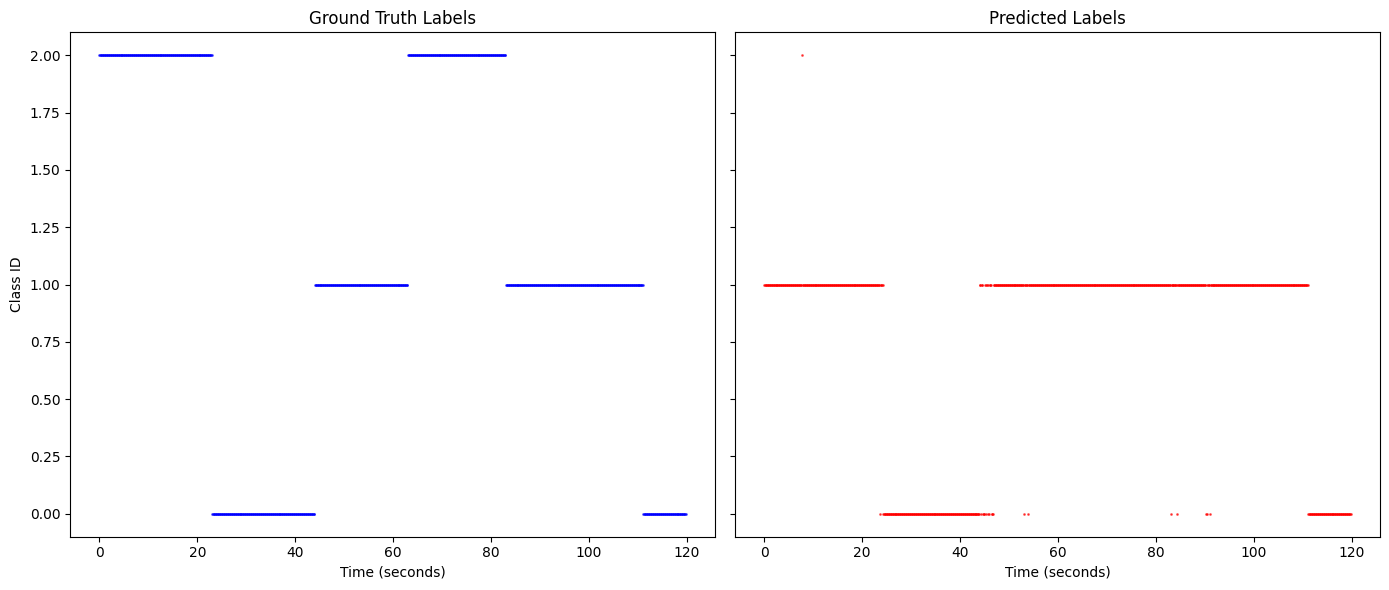

Clustering time series 0 - combined features 
Accuracy: 0.7623873873873874
Confusion Matrix:
[[178   0   0]
 [ 38 287   0]
 [173   0 212]]


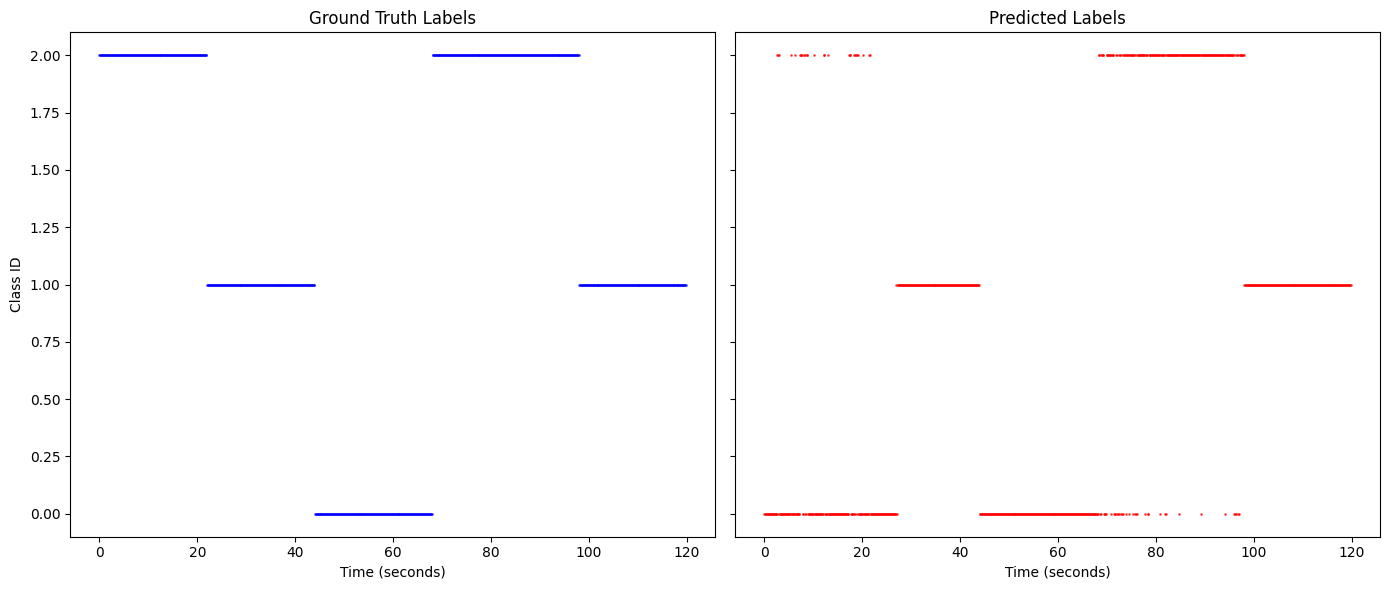

--------------------------------------------------------------------------------
Clustering time series 1 - mfccs features (Optimal)
Accuracy: 0.9932432432432432
Confusion Matrix:
[[334   0   0]
 [  6 215   0]
 [  0   0 333]]


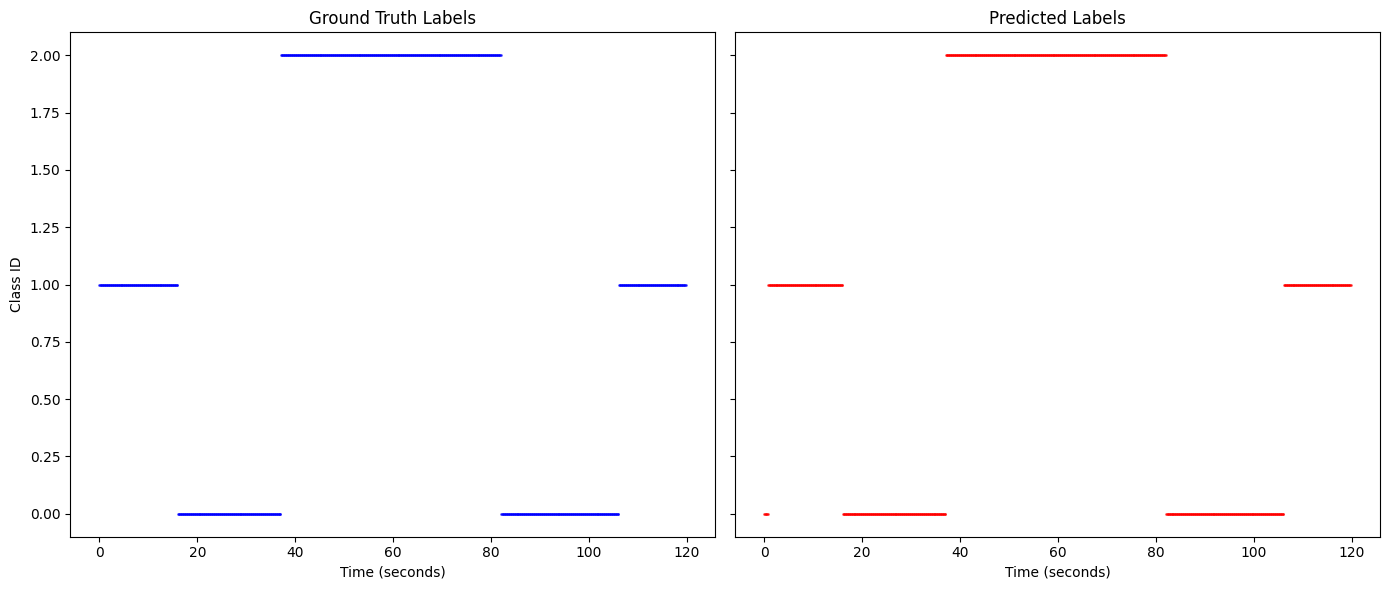

Clustering time series 1 - melspec features 
Accuracy: 0.36824324324324326
Confusion Matrix:
[[326   0   0]
 [244   0   0]
 [317   0   1]]


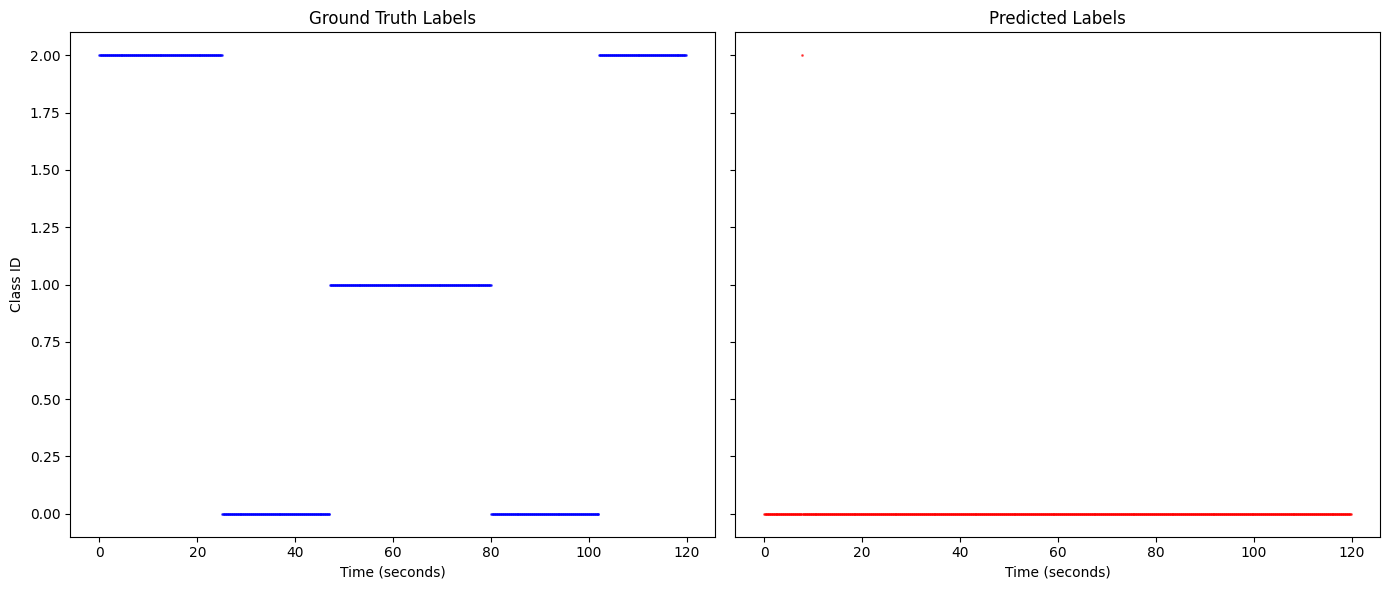

Clustering time series 1 - combined features 
Accuracy: 0.918918918918919
Confusion Matrix:
[[406   0   2]
 [ 34 260   6]
 [  0   0 150]]


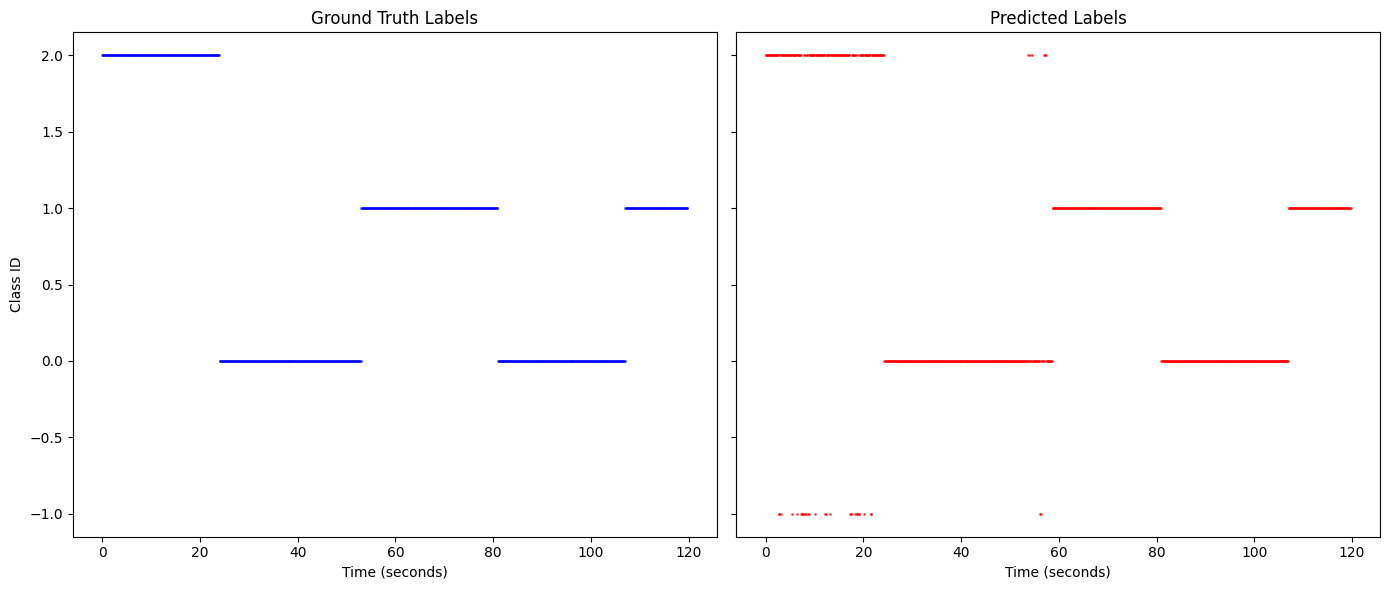

--------------------------------------------------------------------------------
Clustering time series 2 - mfccs features (Optimal)
Accuracy: 0.9988738738738738
Confusion Matrix:
[[408   0   0]
 [  0 318   0]
 [  0   0 161]]


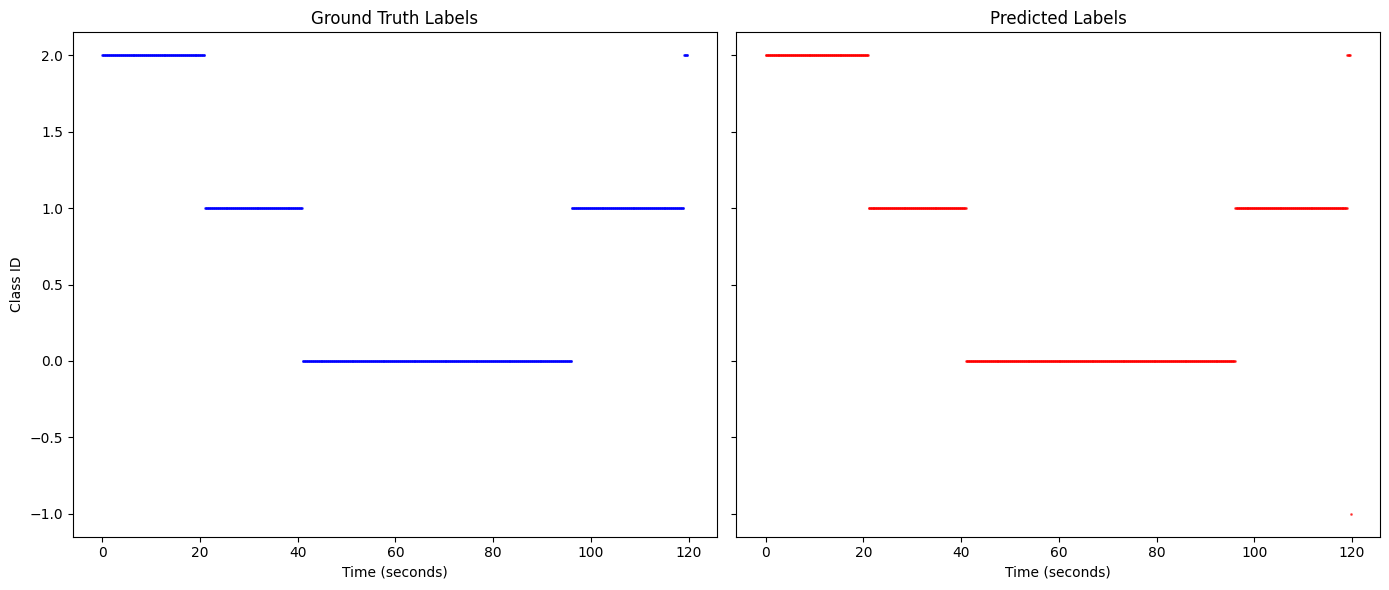

Clustering time series 2 - melspec features 
Accuracy: 0.36711711711711714
Confusion Matrix:
[[  0 259   0]
 [  0 325   0]
 [  0 303   1]]


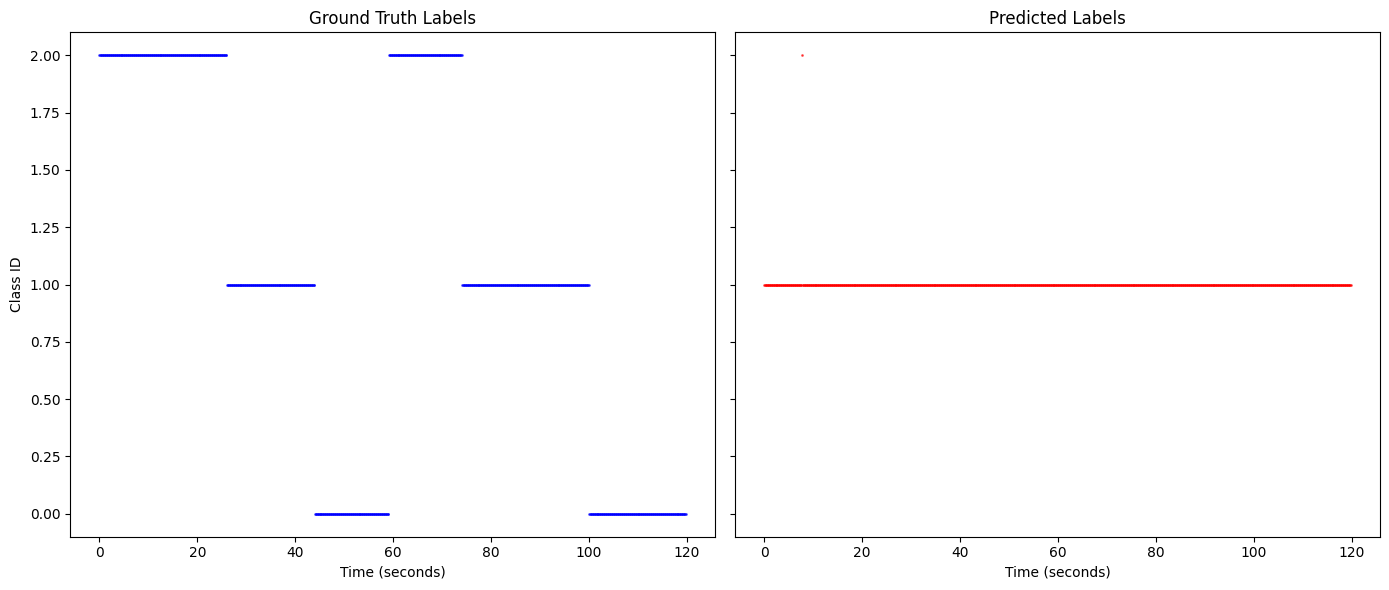

Clustering time series 2 - combined features 
Accuracy: 0.5506756756756757
Confusion Matrix:
[[362   8   0]
 [295   0   0]
 [ 95   0 127]]


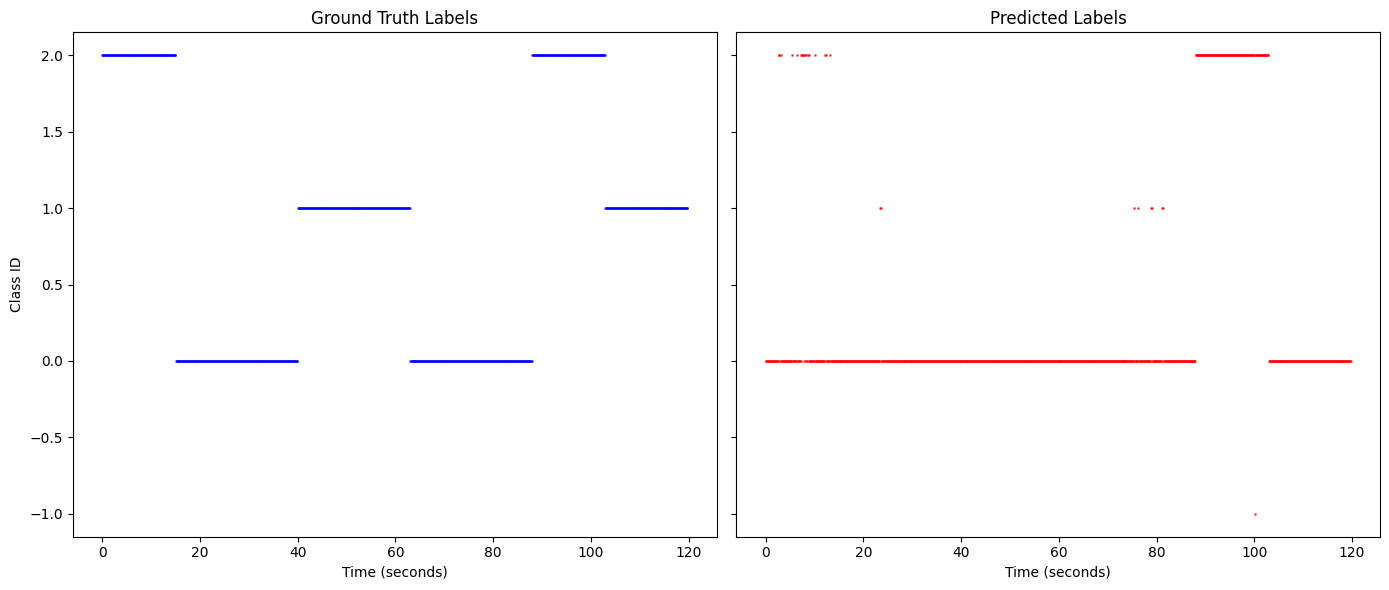

--------------------------------------------------------------------------------
Clustering time series 3 - mfccs features (Optimal)
Accuracy: 1.0
Confusion Matrix:
[[311   0   0]
 [  0 243   0]
 [  0   0 334]]


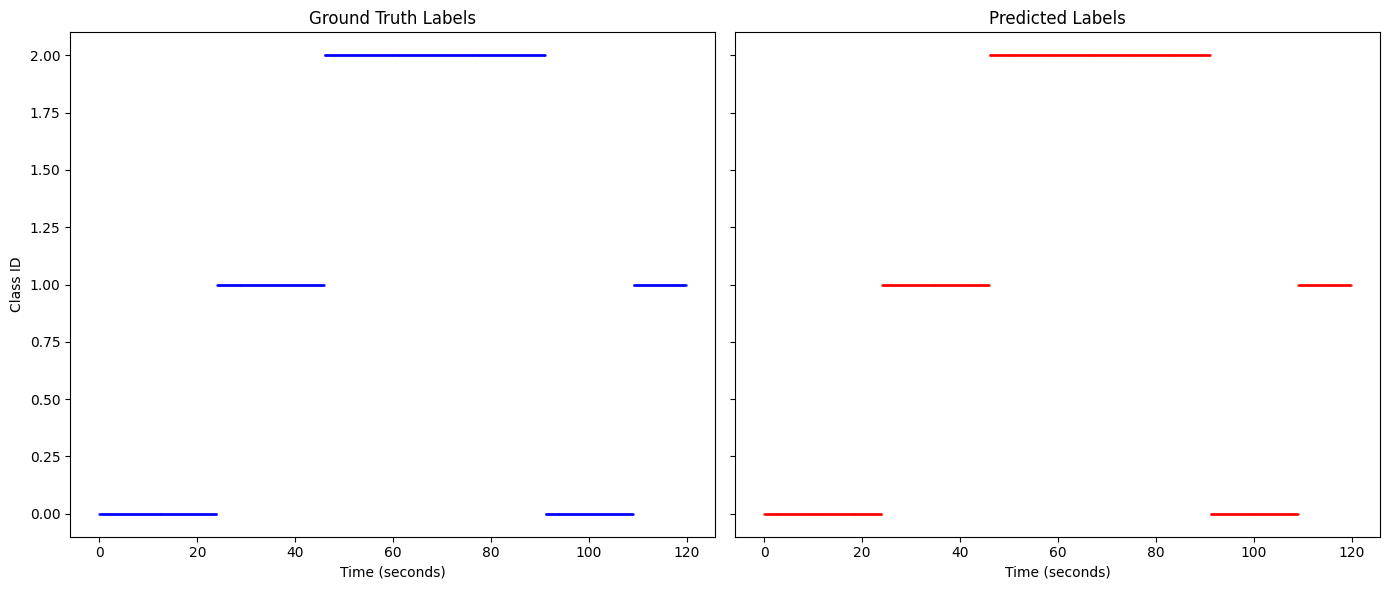

Clustering time series 3 - melspec features 
Accuracy: 0.625
Confusion Matrix:
[[311   0   0]
 [ 36 244   2]
 [290   5   0]]


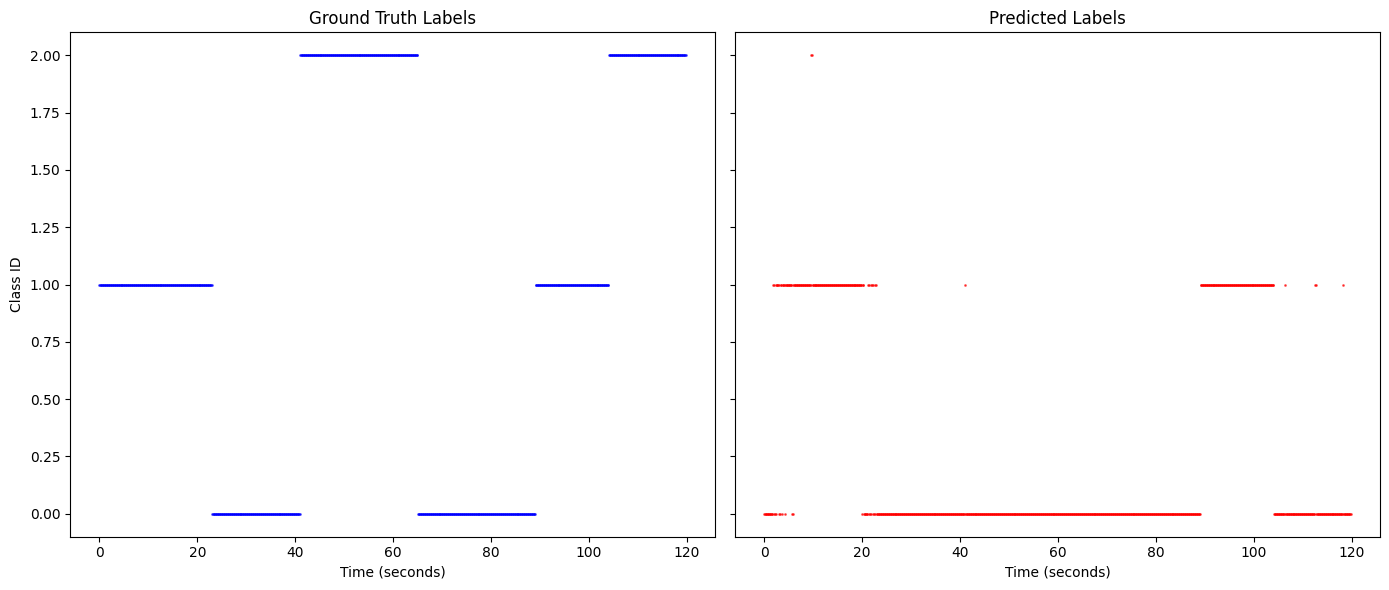

Clustering time series 3 - combined features 
Accuracy: 0.7173423423423423
Confusion Matrix:
[[346   2   0]
 [236   0   0]
 [ 13   0 291]]


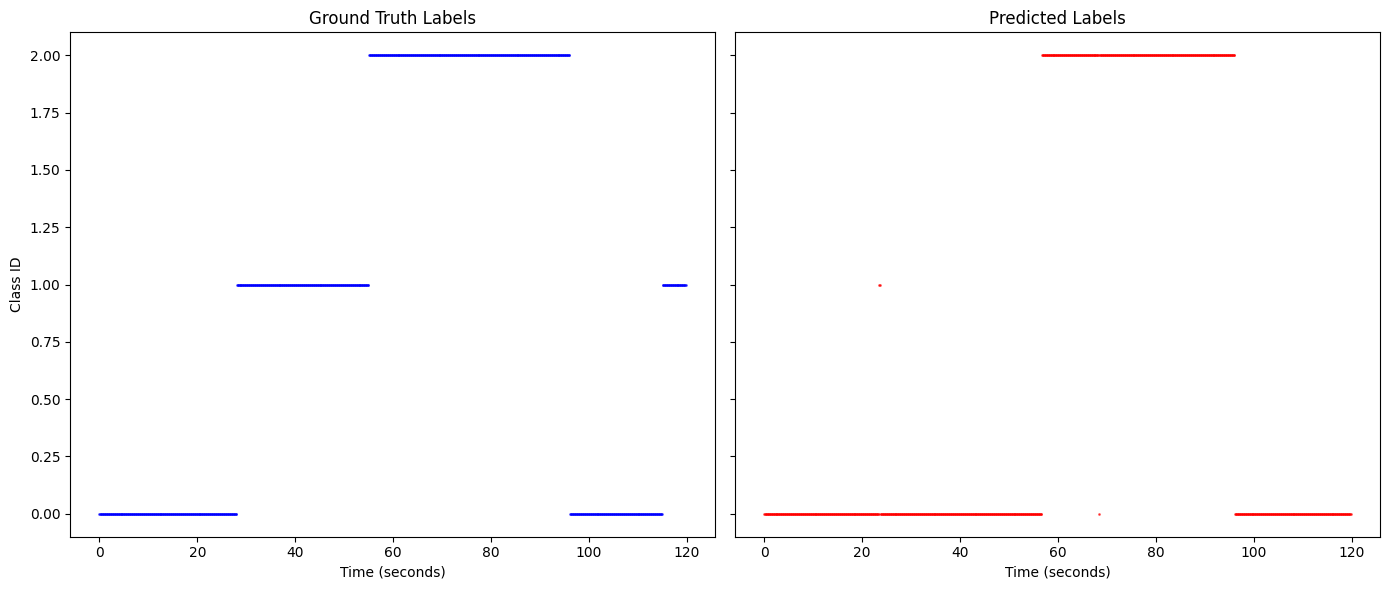

--------------------------------------------------------------------------------
Clustering time series 4 - mfccs features (Optimal)
Accuracy: 0.9932432432432432
Confusion Matrix:
[[273   0   0]
 [  6 172   0]
 [  0   0 437]]


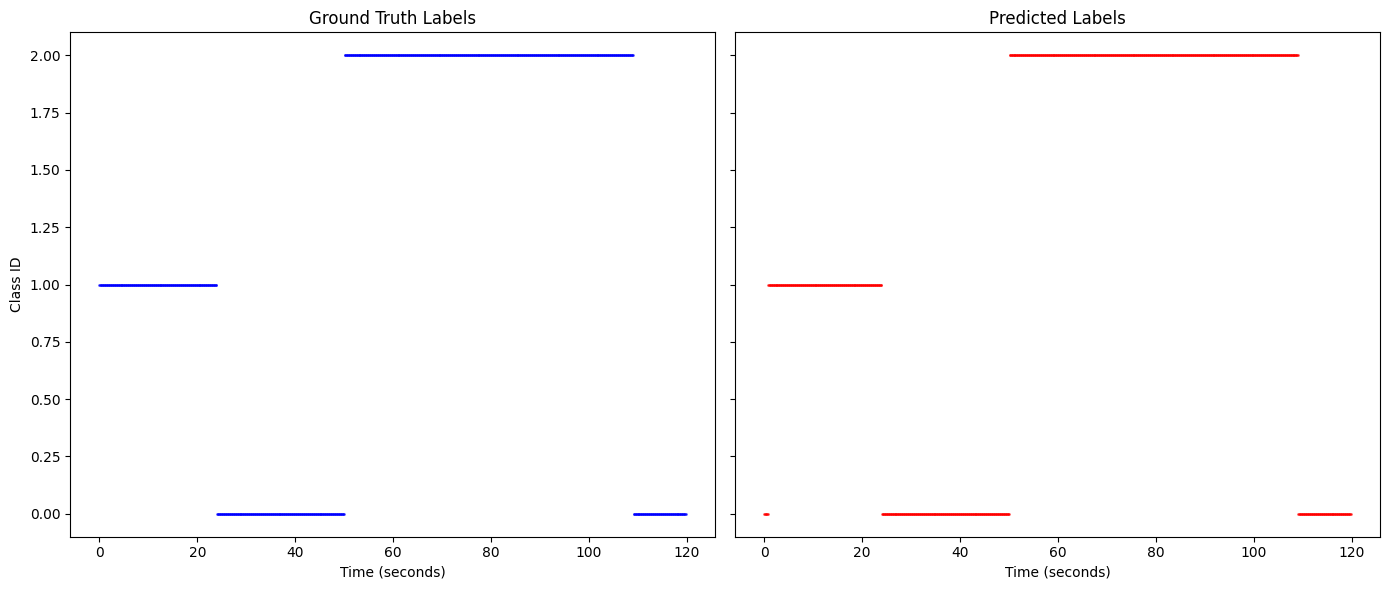

Clustering time series 4 - melspec features 
Accuracy: 0.6587837837837838
Confusion Matrix:
[[  0   0 258]
 [  2 275  27]
 [  1  15 310]]


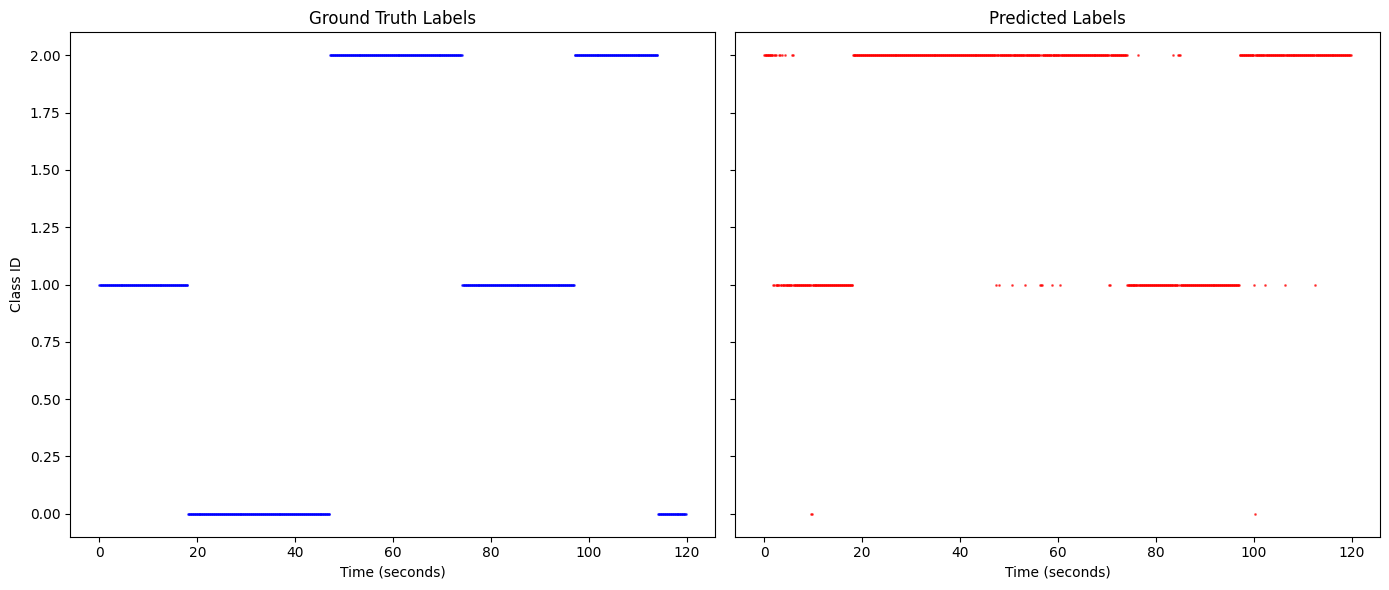

Clustering time series 4 - combined features 
Accuracy: 0.5067567567567568
Confusion Matrix:
[[305   0   0]
 [198 142   0]
 [240   0   3]]


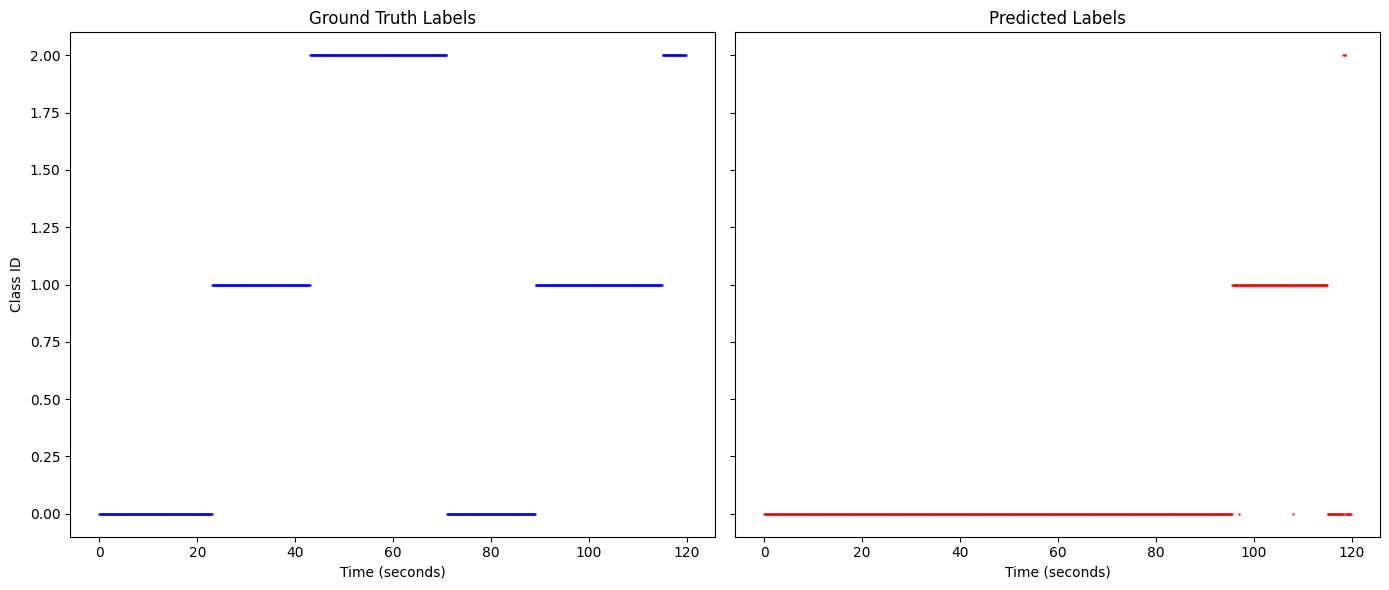

--------------------------------------------------------------------------------


In [10]:
MFCC_PCA_VIGILANCE = 0.15
MELSPEC_PCA_VIGILANCE = 0.26
COMBINED_PCA_VIGILANCE = 0.2

for i in range(5):
    cluster_dataset(i, 'mfccs', mfccs_pca.projected_data.shape[1], 'PCA MFCCs Only Ground Truth vs Predicted Labels', MFCC_PCA_VIGILANCE, True)
    cluster_dataset(i, 'melspec', mfsc_pca.projected_data.shape[1], 'PCA MFSCs Only Ground Truth vs Predicted Labels', MELSPEC_PCA_VIGILANCE, True)
    cluster_dataset(i, 'combined', combined_pca.projected_data.shape[1], 'PCA Combined Ground Truth vs Predicted Labels', COMBINED_PCA_VIGILANCE, True)
    print('-'*80)